In [53]:
import matplotlib.pyplot as plt   
import numpy as np 

In [32]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn

2.1.0+cpu
0.16.0+cpu


In [68]:
transforms_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.5, 0.5, 0.5],
    std=[0.5, 0.5, 0.5]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(size=32),
    transforms.RandomRotation(25)
])

transforms_test = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
  mean=[0.5, 0.5, 0.5],
  std=[0.5, 0.5, 0.5]),
])

In [233]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5
num_classes = 10
batch_size = 10
learning_rate = 0.001

In [234]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms_train)

Files already downloaded and verified


In [235]:
train_loader = torch.utils.data.DataLoader(cifar_trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

In [236]:
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms_test)

Files already downloaded and verified


In [237]:
test_loader = torch.utils.data.DataLoader(cifar_testset, batch_size=10,
                                         shuffle=False, num_workers=2)

In [240]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [241]:
class CIFARClassifierWithDropout(nn.Module):
    def __init__(self, num_classes):
        super(CIFARClassifierWithDropout, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2), 
            nn.BatchNorm2d(32), #batchnormalizacja to normalizacja stanow ukrytych -srednia0/odchylenie1, po kazdej konwolucji warto dac                               
            nn.ReLU(), 
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(64*8*8, num_classes)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        return out

model = CIFARClassifierWithDropout(num_classes).to(device)

In [245]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)

total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        #Krok Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #Krok Backward i optymalizacja
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

#Testowanie modelu
model.eval()  

with torch.no_grad():
    correct = 0 #liczba poprawnie sklasyfikowanych
    total = 0  #liczba wszystkich
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy of the model on the 10000 test images: {100 * correct / total}')

#Zapisujemy nasz model
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/5000], Loss: 0.6721
Epoch [1/5], Step [200/5000], Loss: 0.4469
Epoch [1/5], Step [300/5000], Loss: 0.4827
Epoch [1/5], Step [400/5000], Loss: 0.5773
Epoch [1/5], Step [500/5000], Loss: 1.3006
Epoch [1/5], Step [600/5000], Loss: 0.9111
Epoch [1/5], Step [700/5000], Loss: 1.0775
Epoch [1/5], Step [800/5000], Loss: 0.7857
Epoch [1/5], Step [900/5000], Loss: 0.6422
Epoch [1/5], Step [1000/5000], Loss: 0.6244
Epoch [1/5], Step [1100/5000], Loss: 1.1045
Epoch [1/5], Step [1200/5000], Loss: 0.9339
Epoch [1/5], Step [1300/5000], Loss: 0.5507
Epoch [1/5], Step [1400/5000], Loss: 0.3895
Epoch [1/5], Step [1500/5000], Loss: 0.7110
Epoch [1/5], Step [1600/5000], Loss: 0.5644
Epoch [1/5], Step [1700/5000], Loss: 0.8380
Epoch [1/5], Step [1800/5000], Loss: 0.8419
Epoch [1/5], Step [1900/5000], Loss: 0.3733
Epoch [1/5], Step [2000/5000], Loss: 1.2251
Epoch [1/5], Step [2100/5000], Loss: 1.0101
Epoch [1/5], Step [2200/5000], Loss: 1.2144
Epoch [1/5], Step [2300/5000], Loss: 0.92

Epoch [4/5], Step [3900/5000], Loss: 0.7171
Epoch [4/5], Step [4000/5000], Loss: 0.2599
Epoch [4/5], Step [4100/5000], Loss: 1.0323
Epoch [4/5], Step [4200/5000], Loss: 1.1300
Epoch [4/5], Step [4300/5000], Loss: 0.7161
Epoch [4/5], Step [4400/5000], Loss: 0.5484
Epoch [4/5], Step [4500/5000], Loss: 0.8981
Epoch [4/5], Step [4600/5000], Loss: 0.7949
Epoch [4/5], Step [4700/5000], Loss: 0.8378
Epoch [4/5], Step [4800/5000], Loss: 0.5876
Epoch [4/5], Step [4900/5000], Loss: 0.5913
Epoch [4/5], Step [5000/5000], Loss: 0.7511
Epoch [5/5], Step [100/5000], Loss: 0.9205
Epoch [5/5], Step [200/5000], Loss: 1.0762
Epoch [5/5], Step [300/5000], Loss: 0.6925
Epoch [5/5], Step [400/5000], Loss: 0.3271
Epoch [5/5], Step [500/5000], Loss: 0.5858
Epoch [5/5], Step [600/5000], Loss: 1.0453
Epoch [5/5], Step [700/5000], Loss: 0.7539
Epoch [5/5], Step [800/5000], Loss: 1.0868
Epoch [5/5], Step [900/5000], Loss: 0.3389
Epoch [5/5], Step [1000/5000], Loss: 1.1816
Epoch [5/5], Step [1100/5000], Loss: 1.00

In [248]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms_train)
cifar_data = list(cifar_trainset)

Files already downloaded and verified


In [249]:
cifar_train = cifar_data[:100]    
cifar_val   = cifar_data[100:]

In [252]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

def train(model, train, valid, batch_size=10, num_iters=1, learn_rate=0.0001, weight_decay=0.01):
    train_loader = torch.utils.data.DataLoader(train,
                                               batch_size=batch_size,
                                               shuffle=True) 
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)

    iters, losses, train_acc, val_acc = [], [], [], []

    #trenowanie
    n = 0 # liczba iteracji
    while True:
        if n >= num_iters:
            break
        for imgs, labels in iter(train_loader):
            model.train()
            out = model(imgs)             
            loss = criterion(out, labels) 
            loss.backward()               
            optimizer.step()              
            optimizer.zero_grad()         


            if n % 10 == 9:
                iters.append(n)
                losses.append(float(loss)/batch_size)             
                train_acc.append(get_accuracy(model, train)) 
                val_acc.append(get_accuracy(model, valid))  
            n += 1

    #rysowanie
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


train_acc_loader = torch.utils.data.DataLoader(cifar_train, batch_size=100)
val_acc_loader = torch.utils.data.DataLoader(cifar_val, batch_size=1000)

def get_accuracy(model, data):
    correct = 0
    total = 0
    model.eval()
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=100):
        output = model(imgs) 
        pred = output.max(1, keepdim=True)[1] 
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

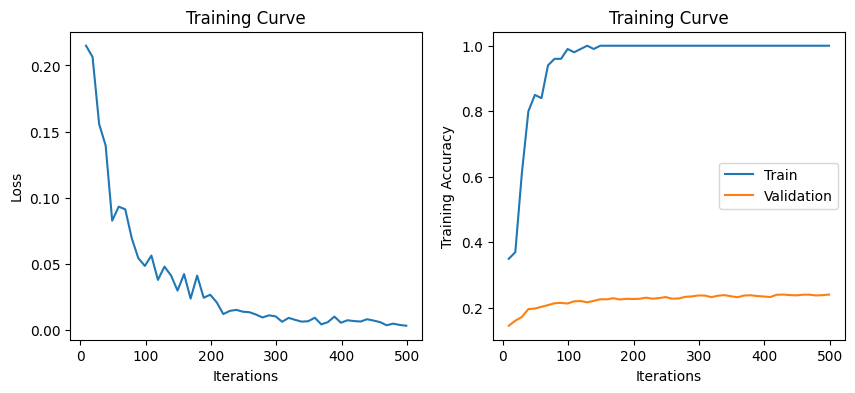

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.2407815631262525


In [253]:
model=CIFARClassifierWithDropout(num_classes).to(device)
train(model, cifar_train, cifar_val, num_iters=500)